**Importando a base**

In [8]:
import pandas as pd 
import io
import numpy as np
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

url = 'https://raw.githubusercontent.com/iagosantosr/projeto-feminicidio/master/Feminicidio_2015_2022.xlsx%20-%20feminicidio_2015_2022.csv'
df = pd.read_csv(url)

In [ ]:
df.head()

**Realizando a análise de ocorrencias por ano e importando a base**

In [ ]:
occur = df.groupby(['ANO ESTATISTICA']).size()
display(occur)

In [9]:
url = 'https://raw.githubusercontent.com/iagosantosr/projeto-feminicidio/master/n_ocorrencias_feminicidio_2015_2022.csv'
df2 = pd.read_csv(url,delimiter=';')

In [ ]:
df2.head()

**Vamos agora criar nossos modelos de Regressão:**

x - variáveis preditoras

y - variável de resposta

**Regressão linear**

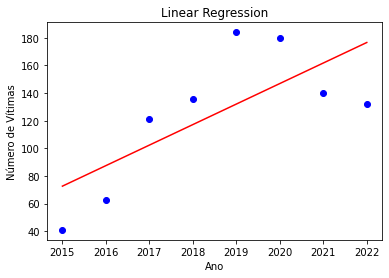

In [14]:

x = df2[['ANO ESTATISTICA']]
y = df2[['N_OCORRENCIA']]

from sklearn.linear_model import LinearRegression
lin = LinearRegression()
  
lin.fit(x, y)

plt.scatter(x, y, color = 'blue')
plt.plot(x, lin.predict(x), color = 'red')
plt.title('Linear Regression')
plt.xlabel('Ano')
plt.ylabel('Número de Vítimas')
  
plt.show()






**Treinando o modelo linear**

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.3, random_state=50)

In [ ]:
predictions = lin.predict(x_test)
# imprimindo as primeiras variáveis preditoras
x_test.head()
# Predições realizadas
predictions

Avaliando nosso modelo

Aqui estão três métricas de avaliação comuns para problemas de regressão:

• Mean Absolute Error (MAE) é a média do valor absoluto dos erros:

• Mean Squared Error (MSE) é a média dos erros quadráticos:

• Root Mean Squared Error (RMSE) é a raiz quadrada da média dos erros ao quadrado:

Comparando estas métricas:

• MAE é o mais fácil de entender, porque é o erro médio.

• MSE é mais popular que o MAE, porque o MSE "pune" erros maiores, o que tende a ser útil no mundo real.

• RMSE é ainda mais popular que o MSE, porque o RMSE é interpretável nas unidades do eixo "y".

In [44]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions))
)

MAE: 35.59920634920733
MSE: 1422.5591931217652
RMSE: 37.71682904383354


**Regressão Polinomial (sem linha)**

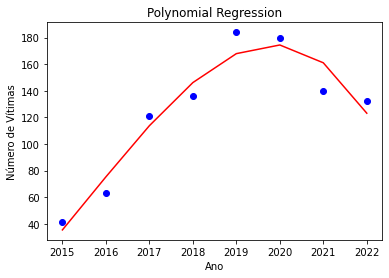

In [26]:
x = df2[['ANO ESTATISTICA']]
y = df2[['N_OCORRENCIA']]

plt.scatter(x, y, color = 'blue')

from sklearn.preprocessing import PolynomialFeatures
  
poly = PolynomialFeatures(degree = 4)
x_poly = poly.fit_transform(x)
  
poly.fit(x_poly, y)
lin2 = LinearRegression()
lin2.fit(x_poly, y)

plt.plot(x, lin2.predict(poly.fit_transform(x)), color = 'red')
plt.title('Polynomial Regression')
plt.xlabel('Ano')
plt.ylabel('Número de Vítimas')
  
plt.show()

**Treinando o modelo polinomial**

In [ ]:
predictions2 = lin2.predict(x_poly)
# imprimindo as primeiras variáveis preditoras
x_test.head()
# Predições realizadas
predictions2

Avaliando nosso modelo

Aqui estão três métricas de avaliação comuns para problemas de regressão:

• Mean Absolute Error (MAE) é a média do valor absoluto dos erros:

• Mean Squared Error (MSE) é a média dos erros quadráticos:

• Root Mean Squared Error (RMSE) é a raiz quadrada da média dos erros ao quadrado:

Comparando estas métricas:

• MAE é o mais fácil de entender, porque é o erro médio.

• MSE é mais popular que o MAE, porque o MSE "pune" erros maiores, o que tende a ser útil no mundo real.

• RMSE é ainda mais popular que o MSE, porque o RMSE é interpretável nas unidades do eixo "y".

In [42]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y, predictions2))
print('MSE:', metrics.mean_squared_error(y, predictions2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y, predictions2))
)

MAE: 10.860966920852661
MSE: 143.62314797224508
RMSE: 11.984287545459058


**Prevendo a quantidade de vitimas de feminicio para o ano de 2023, com base nos anos de 2021 e 2022**

In [43]:
x = df2[['ANO ESTATISTICA']]
y = df2[['N_OCORRENCIA']]
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=2)
neigh.fit(x, y)
print(neigh.predict([[2023]]))

[[136.]]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  "X does not have valid feature names, but"
